In [ ]:
import pandas as pd
import numpy as np

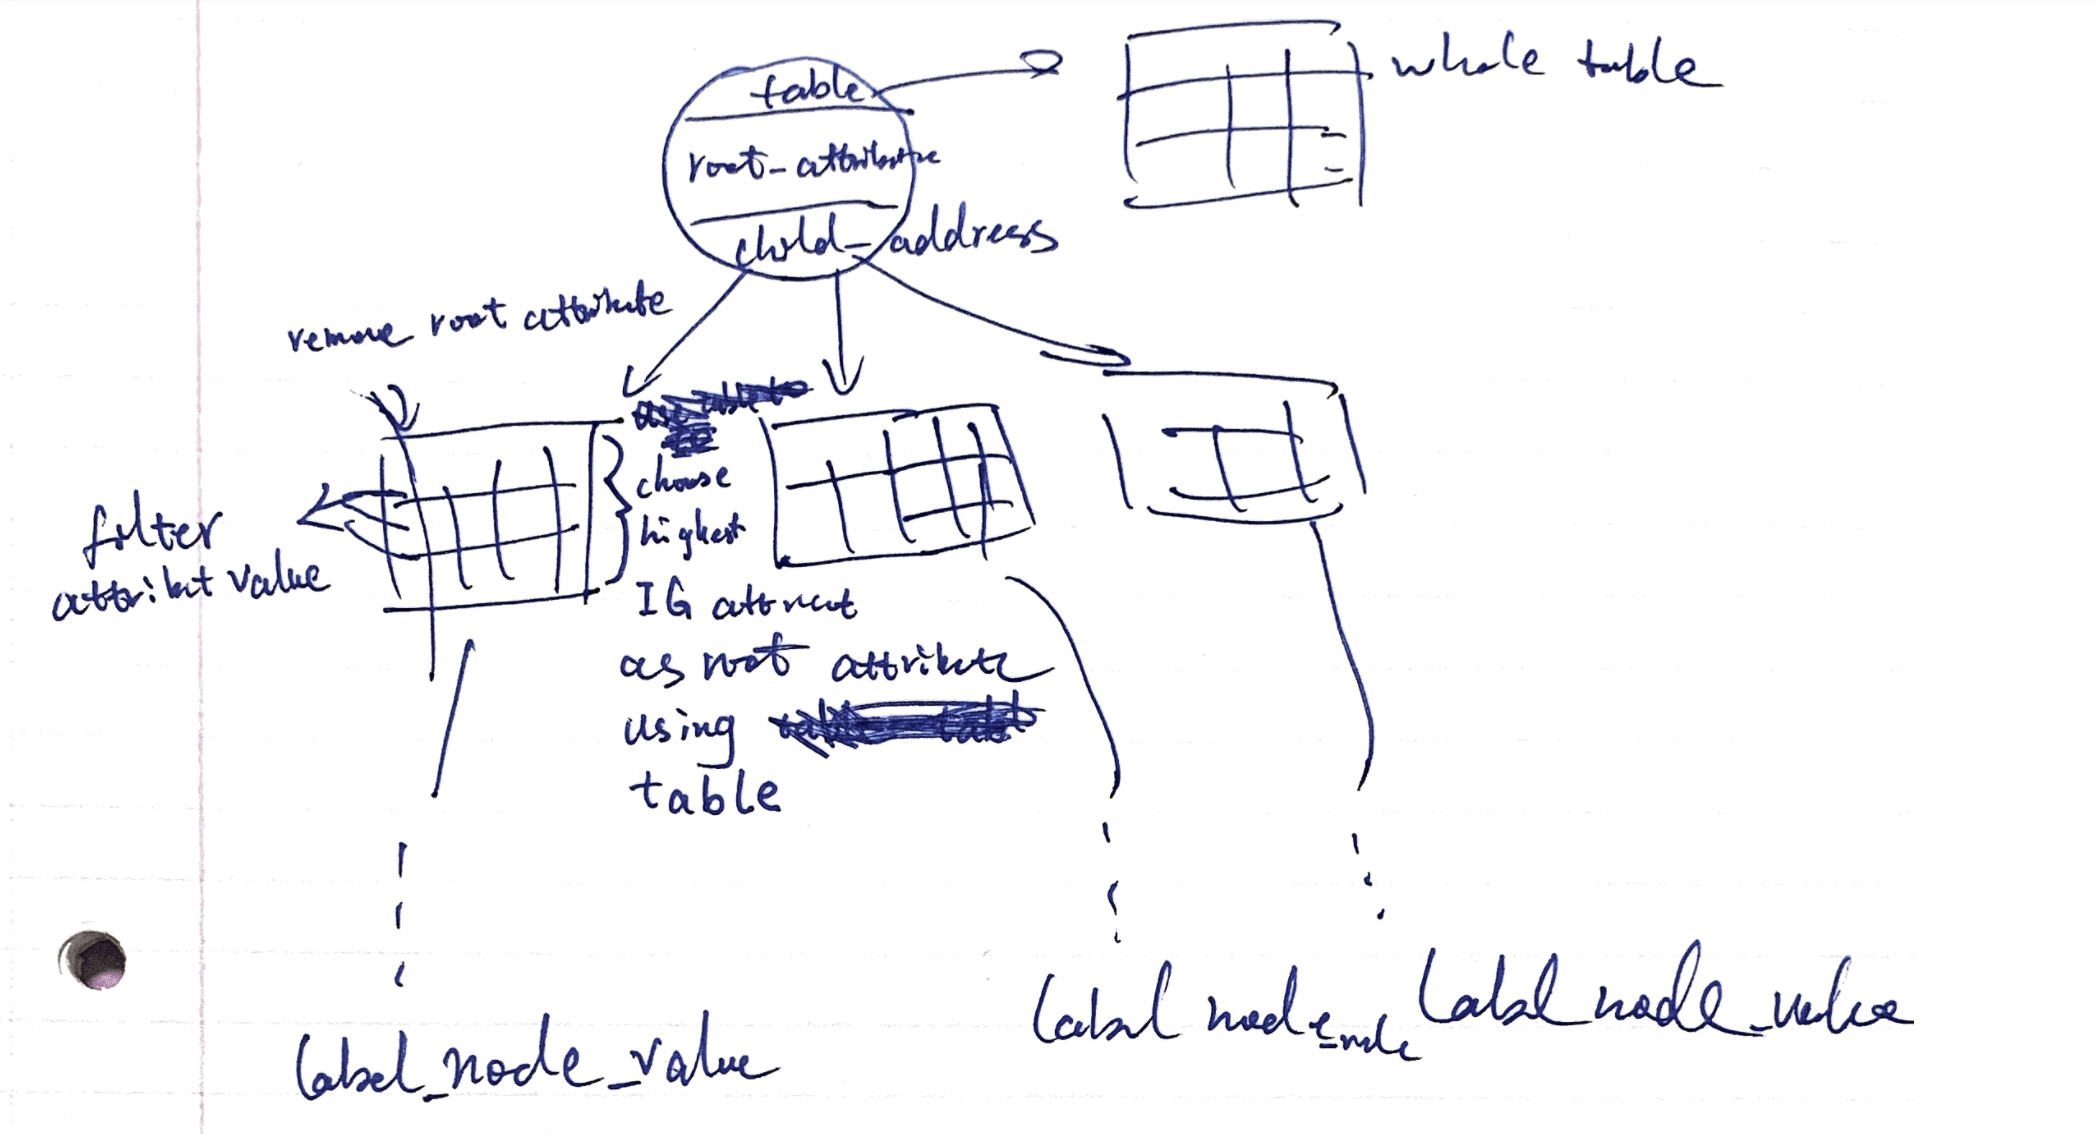

In [ ]:
class Node:
    def __init__(self, table: pd.DataFrame, attribute_name: str, children: dict, label_node_value=None):
        # Root use whole table
        # Choose each attribute value in the highest entropy column to create table
        self.table = table
        # Choose the root node name
        self.attribute_name = attribute_name
        # The key is each attribute value in the highest entropy column
        # The value is node
        self.children = children
        # The label node contain the chosen label name
        self.label_node_value = label_node_value

In [ ]:
# def calculate_parent_entropy(table: pd.DataFrame, attribute_name: str) -> float:
#     """
#     Calculates the entropy of a given attribute
#     """
#     # Get the number of rows in the table
#     n = len(table)
#     # Get the number of rows for each value of the attribute
#     counts = table[attribute_name].value_counts()
#     # Calculate the entropy
#     entropy = 0
#     for count in counts:
#         p = count / n
#         entropy += -p * np.log2(p)
#     return entropy
#
#
# def calculate_parent_entropy(df, y_label=label):
#     """
#     Calculates the entropy of the parent node
#     """
#     df_copy = df.copy()
#     count_unique_label = dict(df_copy[y_label].value_counts())
#     parent_entropy = 0
#     for key, value in count_unique_label.items():
#         parent_entropy = parent_entropy - (value / df_copy.shape[0]) * np.log2(value / df_copy.shape[0])
#     return parent_entropy
#
#
# def information_gain(table: pd.DataFrame, attribute_name: str, target_attribute_name=label) -> float:
#     """
#     Calculates the information gain of a given attribute
#     """
#     # Get the number of rows in the table
#     n = len(table)
#     # Get the number of rows for each value of the attribute
#     counts = table[attribute_name].value_counts()
#     # Calculate the information gain
#     information_gain = calculate_parent_entropy(table, target_attribute_name)
#     for value, count in counts.items():
#         p = count / n
#         information_gain -= p * calculate_parent_entropy(table[table[attribute_name] == value], target_attribute_name)
#     return information_gain
#
#
# def calculate_highest_information_gain(df, y_label=label):
#     """
#     Calculates the highest information gain of the given dataframe
#     """
#     df_copy = df.copy()
#     highest_information_gain = 0
#     highest_information_gain_attribute = ""
#     value = 0
#     for column in df_copy.drop(y_label, axis=1).columns:
#         information_gain_value = information_gain(df_copy, column)
#         if information_gain_value > highest_information_gain:
#             highest_information_gain = information_gain_value
#             highest_information_gain_attribute = column
#             value = information_gain_value
#     return highest_information_gain_attribute, value

In [ ]:
# def information_gain(table: pd.DataFrame, attribute_name: str, target_attribute_name=label) -> float:
#     """
#     Calculates the information gain of a given attribute
#     """
#     # Get the number of rows in the table
#     n = len(table)
#     # Get the number of rows for each value of the attribute
#     counts = table[attribute_name].value_counts()
#     # Calculate the information gain
#     information_gain = calculate_parent_entropy(table, target_attribute_name)
#     for value, count in counts.items():
#         p = count / n
#         information_gain -= p * calculate_parent_entropy(table[table[attribute_name] == value], target_attribute_name)
#     return information_gain
#
#
# def information_gain_ratio(table: pd.DataFrame, attribute_name: str, target_attribute_name=label) -> float:
#     """
#     Calculates the information gain ratio of a given attribute
#     """
#     # Get the number of rows in the table
#     n = len(table)
#     # Get the number of rows for each value of the attribute
#     counts = table[attribute_name].value_counts()
#     # Calculate the information gain
#     information_gain = calculate_parent_entropy(table, target_attribute_name)
#     for value, count in counts.items():
#         p = count / n
#         information_gain -= p * calculate_parent_entropy(table[table[attribute_name] == value], target_attribute_name)
#     # Calculate the split info
#     split_info = 0
#     for value, count in counts.items():
#         p = count / n
#         split_info += -p * np.log2(p)
#     return information_gain / split_info
#
#
# def get_best_attribute(table: pd.DataFrame, target_attribute_name: str, attribute_names: list, criterion: str) -> str:
#     """
#     Returns the best attribute to split the table on
#     """
#     # Calculate the information gain for each attribute
#     information_gains = []
#     for attribute_name in attribute_names:
#         if criterion == "information_gain":
#             information_gains.append(information_gain(table, attribute_name, target_attribute_name))
#         elif criterion == "information_gain_ratio":
#             information_gains.append(information_gain_ratio(table, attribute_name, target_attribute_name))
#     # Return the attribute with the highest information gain
#     return attribute_names[np.argmax(information_gains)]

In [ ]:
def calculate_parent_entropy(df, y_label):
    """
    Calculates the entropy of the parent node
    """
    df_copy = df.copy()
    count_unique_label = dict(df_copy[y_label].value_counts())
    parent_entropy = 0
    for key, value in count_unique_label.items():
        parent_entropy = parent_entropy - (value / df_copy.shape[0]) * np.log2(value / df_copy.shape[0])
    return parent_entropy


def calculate_children_entropy(df: pd.DataFrame, y_label):
    """
    Calculates the entropy of the children nodes
    """
    df_copy = df.copy()
    total_entropy_info_list = []
    for attribute in df_copy.drop(y_label, axis=1).columns:
        total_entropy_info = 0
        for attribute_value in dict(df_copy[attribute].value_counts()):
            temp_df = df_copy[df_copy[attribute] == attribute_value]
            count_unique_label = dict(temp_df[y_label].value_counts())
            child_entropy = 0
            weight = 0
            for key, value in count_unique_label.items():
                child_entropy = child_entropy - (value / temp_df.shape[0]) * np.log2(value / temp_df.shape[0])
                weight = weight + value
            weight = weight / df_copy.shape[0]
            # print((attribute + " " + attribute_value + " entropy info", child_entropy))
            # print(("weight " + attribute_value, weight))
            # print((attribute + " " + attribute_value + " total entropy info", weight * child_entropy))
            total_entropy_info = total_entropy_info + weight * child_entropy
        # total_entropy_info_list.append((attribute + " total entropy info", total_entropy_info))
        total_entropy_info_list.append((attribute, total_entropy_info))
    return total_entropy_info_list


def calculate_highest_information_gain(parent_entropy, child_entropy_info_list):
    info_gain_list = []
    for child_entropy_info in child_entropy_info_list:
        attribute = child_entropy_info[0]
        info_gain = parent_entropy - child_entropy_info[1]
        info_gain_list.append((attribute, info_gain))
    # https://stackoverflow.com/questions/13145368/how-to-find-the-maximum-value-in-a-list-of-tuples
    highest_information_gain = max(info_gain_list, key=lambda item: item[1])
    return highest_information_gain

In [ ]:
def get_subtables(table: pd.DataFrame, attribute_name: str) -> dict:
    """
    Returns a dictionary of subtables
    """
    # Get the number of rows in the table
    n = len(table)
    # Get the number of rows for each value of the attribute
    counts = table[attribute_name].value_counts()
    # Create a dictionary of subtables
    subtables = {}
    for value, count in counts.items():
        subtables[value] = table[table[attribute_name] == value].reset_index(drop=True)
    return subtables

In [ ]:
def build_tree(node: Node, target_attribute_name: str, attribute_names: list):
    """
    Builds the decision tree
    """
    table = node.table
    # Get the number of rows in the table
    n = len(table)
    # Get the number of rows for each value of the target attribute
    counts = table[target_attribute_name].value_counts()
    # If there are no rows in the table, return the parent node class
    if n == 0:
        return None
    # If there is only one value of the target attribute, return that value
    elif len(counts) == 1:
        node.attribute_name = "you are at the label node"
        node.label_node_value = counts.index[0]
        return
    # If there are no attributes left, return the most common value of the target attribute
    elif len(attribute_names) == 0:
        node.attribute_name = "you are at the label node"
        node.label_node_value = counts.index[0]
        return
    # If none of the above, grow the tree
    else:
        # Get the best attribute
        # best_attribute = get_best_attribute(table, target_attribute_name, attribute_names, criterion)
        parent_entropy = calculate_parent_entropy(table, target_attribute_name)
        child_entropy_info_list = calculate_children_entropy(table, target_attribute_name)
        best_attribute = calculate_highest_information_gain(parent_entropy, child_entropy_info_list)[0]
        # Create a new decision tree node with the best attribute
        node.attribute_name = best_attribute
        # Create a new decision tree sub-node for each value of the best attribute
        subtables = get_subtables(table, best_attribute)
        for value, subtable in subtables.items():
            # Remove the best_attribute from the subtable
            subtable = subtable.drop(best_attribute, axis=1)
            # Create a new decision tree sub-node
            child_node = Node(subtable, "", {})
            # Add the new decision tree sub-node to the children of the node
            node.children[value] = child_node
            # get X dataset attributes
            attribute_names = list(subtable.drop(target_attribute_name, axis=1).columns)
            # Recursively call the function to create the subtree
            build_tree(child_node, target_attribute_name, attribute_names)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/vamc-stash/Decision-Tree/master/Data/weather.txt", sep="\t")
label = "Play"
df = pd.get_dummies(df, columns=df.columns[:-1])
df = df.replace(0, "true")
df = df.replace(1, "false")
df

Play Outlook_Overcast Outlook_Rainy Outlook_Sunny Temp_Cool Temp_Hot  \
0    no             true         false          true      true    false   
1    no             true         false          true      true    false   
2   yes            false          true          true      true    false   
3   yes             true          true         false      true     true   
4   yes             true          true         false     false     true   
5    no             true          true         false     false     true   
6   yes            false          true          true     false     true   
7    no             true         false          true      true     true   
8   yes             true         false          true     false     true   
9   yes             true          true         false      true     true   
10  yes             true         false          true      true     true   
11  yes            false          true          true      true     true   
12  yes            false          true          true      true    false   
13   no             true          true         false      true     true   

   Temp_Mild Humidity_High Humidity_Normal Windy_f Windy_t  
0       true         false            true   false    true  
1       true         false            true    true   false  
2       true         false            true   false    true  
3      false         false            true   false    true  
4       true          true           false   false    true  
5       true          true           false    true   false  
6       true          true           false    true   false  
7      false         false            true   false    true  
8       true          true           false   false    true  
9      false          true           false   false    true  
10     false          true           false    true   false  
11     false         false            true    true   false  
12      true          true           false   false    true  
13     false         false            true    true   false

In [ ]:
# df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
#                  names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"],
#                  header=None)
# label = "class"
# df = pd.get_dummies(data=df, columns=["buying", "maint", "doors", "persons", "lug_boot", "safety"])
# df

In [ ]:
# df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data",
#                  names=["Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast",
#                         "breast-quad", "irradiat"],
#                  header=None)
# label = "Class"
# df = pd.get_dummies(data=df, columns=["age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast",
#                                       "breast-quad", "irradiat"])
# df

In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
# label = "Survived"
# df = df.dropna()
# df = df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Fare"], axis=1)
# # convert age column to age groups
# # df["Age"] = pd.cut(df["Age"], bins=20, labels=[i for i in range(20)])
# df["Age"] = pd.cut(df["Age"], bins=[0, 2, 17, 65, 100], labels=["Baby", "Child", "Adult", "Elderly"])
# # convert fare column to fare groups
# # df["Fare"] = pd.cut(df["Fare"], bins=20, labels=[i for i in range(20)])
# # df["Fare"] = pd.cut(df["Fare"], bins=4,
# #                     labels=["low", "medium", "high", "very_high"])
# df = pd.get_dummies(df, columns=df.columns[1:])
# df

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(label, axis=1), df[label], test_size=0.2, random_state=100,
                                                    shuffle=True)
X_train[label] = y_train
train_dataset = X_train

In [ ]:
root = Node(train_dataset, "", {})

In [ ]:
build_tree(root, label, list(train_dataset.drop(label, axis=1).columns))

In [ ]:
def accuracy_score(root, X_test, y_test):
    predict_list = []

    def predict(test_row: pd.DataFrame, node: Node):
        if node.attribute_name == "you are at the label node":
            predict_list.append(node.label_node_value)
            return
        try:
            attribute_value = test_row[node.attribute_name]
            child_node = node.children[attribute_value]
            predict(test_row, child_node)
        except KeyError:
            predict_list.append(node.label_node_value)
            return

    for index, test_row in X_test.iterrows():
        predict(test_row, root)

    count = 0
    for i in range(0, len(predict_list)):
        if predict_list[i] == list(y_test)[i]:
            count = count + 1
    return count / len(predict_list)

In [ ]:
accuracy_score(root, X_test, y_test)

0.3333333333333333

In [ ]:
def print_tree(root: Node, level: int):
    if root.attribute_name == "you are at the label node":
        print("|-" + "---" * level, root.label_node_value)
        return
    print("|-" + "---" * level, root.attribute_name)
    for key, value in root.children.items():
        print("|-" + "---" * level, key)
        print_tree(value, level + 1)

In [ ]:
print_tree(root, 0)

|- Humidity_High
|- false
|---- Outlook_Rainy
|---- false
|------- no
|---- true
|------- Windy_f
|------- false
|---------- yes
|------- true
|---------- no
|- true
|---- yes
